## 유클리드 거리
> * d = sqt{(a1-a2)^2+(b1-b2)^2}

## 맨하탄 거리 
> * d = |a1-a2| + |b1-b2|

In [106]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler,LabelEncoder

In [107]:
citrus = pd.read_csv("datasets/citrus.csv")

In [108]:
citrus.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [109]:
citrus.name.value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [110]:
citrus.name.unique()

array(['orange', 'grapefruit'], dtype=object)

In [111]:
citrus.duplicated(keep=False).sum()

0

In [112]:
citrus[citrus.duplicated(keep=False)]
# 중복 데이터 존재 X

,name,diameter,weight,red,green,blue


In [113]:
citrus['name'].value_counts()
# 데이터의 imblanced가 존재하지 않음을 확인할 수 있다

orange        5000
grapefruit    5000
Name: name, dtype: int64

<AxesSubplot:xlabel='diameter', ylabel='Count'>

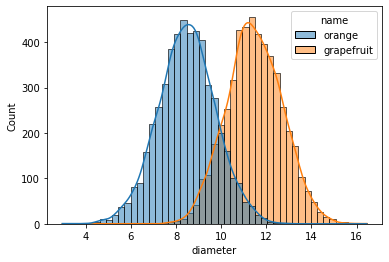

In [114]:
sns.histplot(data=citrus,x='diameter',hue='name', kde=True,cbar=False)

In [115]:
# 레이블 인코딩

In [116]:
df = citrus.copy()

In [117]:
def label_encoding(x):
    if x == "orange":
        return 1
    else:
        return 0

In [118]:
# map 버전
df['name'].map({'orange': 1, 'grapefruit':0 })

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: name, Length: 10000, dtype: int64

In [119]:
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [120]:
#labelencoding sklearn functiong 활용 방식

In [121]:
lb_encoder = LabelEncoder()
lb_encoder.fit(df['name'])

LabelEncoder()

In [122]:
encoder_df = lb_encoder.transform(df['name'])

In [123]:
lb_encoder.classes_
#변환된 속성값을 출력해줌

array(['grapefruit', 'orange'], dtype=object)

In [124]:
df['name'] = encoder_df

In [125]:
df

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,0,15.35,253.89,149,77,20
9996,0,15.41,254.67,148,68,7
9997,0,15.59,256.50,168,82,20
9998,0,15.92,260.14,142,72,11


In [126]:
# 데이터 정규화

In [127]:
# 데이터 학습/검증 데이터 분리

In [128]:
X = df.iloc[:,1:]

In [129]:
y = df.iloc[:,0:1]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2 , shuffle =True, random_state =2022, stratify=y)
# startify: test,train 사이의 label들의 균형을 균일하게 뽑히도록 조정해준다.

In [131]:
X_train

,diameter,weight,red,green,blue
465,6.82,128.08,159,93,3
5055,8.81,153.11,139,64,4
978,7.42,136.61,154,76,15
4787,10.67,184.66,166,88,19
105,5.84,114.96,152,84,17
...,...,...,...,...,...
1750,8.00,145.63,150,88,2
4633,10.30,179.88,157,71,2
7023,11.16,192.65,143,75,5
8443,12.09,206.94,154,53,2


# 정규화는 데이터를 분리 후 진행한다 
> * 왜냐하면 통합 데이터를 정규화를 진행하게된다면 결국 테스트 데이터가 학습과정에 어느정도 참여하게 되기때문이다.
> * 표준 정규분포 : Z-score scaller or standard scaler라고 부른다

In [132]:
st = StandardScaler()

In [133]:
st.fit(X_train)
X_std_train = st.transform(X_train)

In [134]:
X_std_train

array([[-1.61852607, -1.60693378,  0.48456216,  1.45730586, -0.92140149],
       [-0.59932084, -0.75195291, -1.42739703, -1.02134167, -0.81169288],
       [-1.31122801, -1.31556395,  0.00657236,  0.00430558,  0.39510185],
       ...,
       [ 0.60426322,  0.59866411, -1.04500519, -0.08116502, -0.70198426],
       [ 1.08057521,  1.08678543,  0.00657236, -1.96151832, -1.0311101 ],
       [ 0.85010167,  0.85758361, -1.52299499, -0.08116502, -0.92140149]])

In [135]:
y_std_train = y_train.to_numpy()

In [149]:
y_std_train=y_std_train.reshape([-1])

In [224]:
knn = KNeighborsClassifier(n_neighbors=15)

In [225]:
knn.fit(X_std_train,y_std_train)

KNeighborsClassifier(n_neighbors=15)

## 테스트

In [226]:
X_std_test = st.transform(X_test)

In [227]:
y_std_test = y_test.to_numpy()

In [228]:
y_pred = knn.predict(X_std_test)

In [229]:
y_pred[:10]

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [230]:
y_std_test[:10]

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [242]:
y_std_test =y_std_test.reshape([-1])

* test, pred의 타입과 차원이 동일해야 정확한 성능평가 지표가 나온다.

In [243]:
(y_std_test==y_pred).sum()/X_std_test.shape[0]

0.9225

In [244]:
y_pred.shape

(2000,)

In [245]:
from sklearn.metrics import confusion_matrix

In [246]:
cm = confusion_matrix(y_std_test,y_pred)

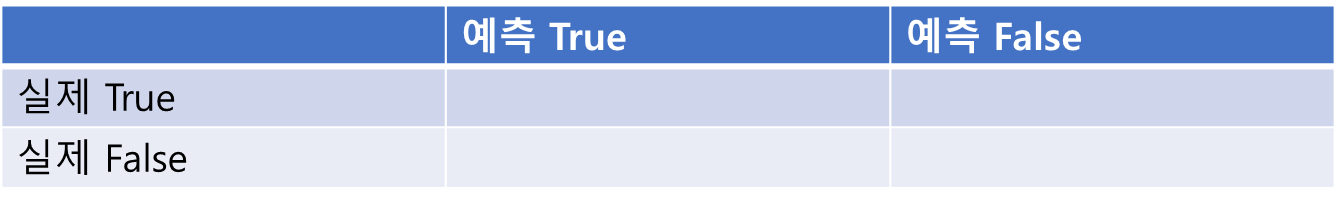

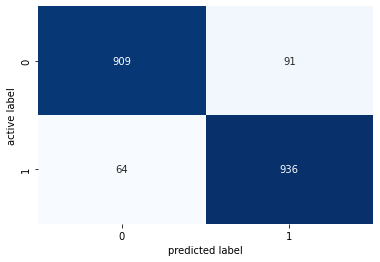

In [247]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt='g',cbar=False,cmap="Blues")
plt.ylabel("active label")
plt.xlabel("predicted label")
plt.show()

In [248]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def print_score(y_test,y_pred):
    print(f'정확도 : {accuracy_score(y_test,y_pred)}')
    print(f'정밀도 : {precision_score(y_test,y_pred)}')
    print(f'재현율 : {recall_score(y_test,y_pred)}')

In [249]:
print_score(y_test,y_pred)

정확도 : 0.9225
정밀도 : 0.9113924050632911
재현율 : 0.936


In [269]:
dicts = []
hist = []
for k in range(3,51):
    # 새로운 모델 k 값을 
    # 학습
    # 예측 정확도
    #
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_std_train,y_std_train)
    y_pred = knn.predict(X_std_test)
    hist.append([k,accuracy_score(y_test,y_pred)])

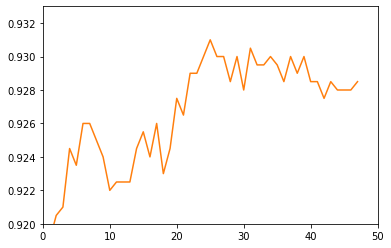

In [288]:
plt.figure(figsize=(6,4))
plt.plot(hist)
plt.ylim(0.92,0.933)
plt.xlim(0, 50)

plt.show()

# K-fold
> 기본적으로 모든 모델에서 활용해보는것이 좋음

In [301]:
X_std_test.shape

(2000, 5)

In [321]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=2022)
acc_scores =[]
for train_idx, val_indx in kf.split(X_std_train):
    #train_idx-> 인덱스 번호 리스트를 가지고 와준다.
    train_x,val_x = X_std_train[train_idx],X_std_train[val_indx]
    train_y,val_y = y_std_train[train_idx],y_std_train[val_indx]
    
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(train_x,train_y)
    y_pred = model.predict(val_x)
    acc_scores.append(accuracy_score(val_y,y_pred))

print(f"정확도 : {np.array(acc_scores).mean()}")

정확도 : 0.9193749999999999


In [319]:
print(np.array(acc_scores).mean())


0.9193749999999999


In [328]:
avg = {}
for k in range(3,50):
    acc_scores =[]
    for train_idx, val_indx in kf.split(X_std_train):
        #train_idx-> 인덱스 번호 리스트를 가지고 와준다.
        train_x,val_x = X_std_train[train_idx],X_std_train[val_indx]
        train_y,val_y = y_std_train[train_idx],y_std_train[val_indx]
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_x,train_y)
        y_pred = model.predict(val_x)
        acc_scores.append(accuracy_score(val_y,y_pred))
    print("--------------------------------------------")
    print(acc_scores)
    print(f"{k}번째 정확도 : {np.array(acc_scores).mean()}")
    avg[k] = np.array(acc_scores).mean()

--------------------------------------------
[0.90375, 0.89875, 0.9325, 0.91625, 0.91125]
3번째 정확도 : 0.9125
--------------------------------------------
[0.90375, 0.90375, 0.924375, 0.913125, 0.911875]
4번째 정확도 : 0.9113749999999999
--------------------------------------------
[0.914375, 0.91125, 0.934375, 0.92125, 0.915625]
5번째 정확도 : 0.9193749999999999
--------------------------------------------
[0.908125, 0.905625, 0.93375, 0.925625, 0.9175]
6번째 정확도 : 0.9181250000000001
--------------------------------------------
[0.91125, 0.9075, 0.935625, 0.924375, 0.91875]
7번째 정확도 : 0.9195
--------------------------------------------
[0.913125, 0.9075, 0.936875, 0.924375, 0.915625]
8번째 정확도 : 0.9195
--------------------------------------------
[0.910625, 0.908125, 0.936875, 0.92875, 0.915625]
9번째 정확도 : 0.9200000000000002
--------------------------------------------
[0.911875, 0.909375, 0.93625, 0.928125, 0.9175]
10번째 정확도 : 0.920625
--------------------------------------------
[0.9125, 0.9125, 0.9387

In [348]:
!pip install tqdm

     ---------------------------------------- 78.4/78.4 kB 4.3 MB/s eta 0:00:00


In [349]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

hist = []

for k in tqdm(range(3,51)):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_std_train, y_std_train, cv=5, scoring="accuracy")
    
    hist.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:15<00:00,  3.04it/s]


In [345]:
dicts ={}
for a,k in enumerate(hist):
    dicts[a] = k

In [346]:
dicts

{0: 0.909,
 1: 0.9112500000000001,
 2: 0.915,
 3: 0.9164999999999999,
 4: 0.9176249999999999,
 5: 0.9190000000000002,
 6: 0.91975,
 7: 0.9200000000000002,
 8: 0.9212499999999999,
 9: 0.9205,
 10: 0.91975,
 11: 0.9203749999999999,
 12: 0.9217500000000001,
 13: 0.9215,
 14: 0.9233750000000001,
 15: 0.92325,
 16: 0.9231250000000001,
 17: 0.924,
 18: 0.924,
 19: 0.92425,
 20: 0.9243749999999998,
 21: 0.9247500000000001,
 22: 0.9253750000000001,
 23: 0.925,
 24: 0.9256249999999999,
 25: 0.9250000000000002,
 26: 0.9248750000000001,
 27: 0.9257499999999999,
 28: 0.926375,
 29: 0.9251249999999999,
 30: 0.9255000000000001,
 31: 0.9245000000000001,
 32: 0.9257500000000001,
 33: 0.926375,
 34: 0.926375,
 35: 0.9261250000000001,
 36: 0.9259999999999999,
 37: 0.9253750000000001,
 38: 0.9262500000000001,
 39: 0.92675,
 40: 0.9259999999999999,
 41: 0.9265000000000001,
 42: 0.9265000000000001,
 43: 0.925,
 44: 0.9253750000000001,
 45: 0.9255000000000001,
 46: 0.9259999999999999,
 47: 0.926125000000000

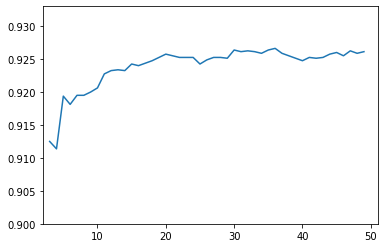

In [337]:
plt.figure(figsize=(6,4))
plt.plot(avg.keys(),avg.values())
plt.ylim(0.90,0.933)
plt.xlim(2, 51)

plt.show()